In [1]:
### Redes Neuronales
### v2

In [2]:
import math
import pandas as pd
import numpy as np
import random
import sklearn.neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from keras import models, layers, optimizers, regularizers
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# En keras los regularizadores estan en regularized

In [3]:
from sklearn.datasets import load_wine

wines = load_wine()


In [4]:
# para poner nombres
features = wines.feature_names

In [5]:
## Separacion tradicional
X_train, X_test, y_train, y_test = train_test_split(wines.data,
                                                    wines.target,test_size=0.3,random_state=123)

## Estandarizado, no normalizado!
scaler = StandardScaler()
scaler.fit(wines.data)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [6]:
## Hemos visto hasta ahora los perceptrones multicapa. MLPClassifier es eso.

#
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
# alpha asociado a regularizacion l2, basado en la fuerza de la regularizacion
# learning_rate opera solo si solver es 'sgd'
clf = sklearn.neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), 
                                           random_state=1,
                                           verbose=True)

#clf2 = sklearn.neural_network.MLPClassifier(activation = 'identity',
#                                            solver='sgd', 
#                                            alpha=1e-5,
#                    hidden_layer_sizes=(5, 2), learning_rate = 'adaptative',
#                                            random_state=1)

clf.fit(X_train, y_train)
sklearn.neural_network.MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [7]:
#clf2.fit(X_train, y_train)
# Por que pasa esto?

In [8]:


df = pd.DataFrame({'predicted': clf.predict(X_test),
             'real': y_test})

pd.crosstab(index=df['real'], columns=df['predicted'], margins=True)


predicted,0,1,2,All
real,,,,
0,14,0,0,14
1,0,18,0,18
2,0,1,21,22
All,14,19,21,54


In [9]:


hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
                     
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 7            # how many epochs to train for
batch_size = 16       # how many samples to use for each gradient descent update



Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 12.0705 - accuracy: 0.3710
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 6.0215 - accuracy: 0.4516
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: -1.6092 - accuracy: 0.6210
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: -2.8045 - accuracy: 0.6532
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: -2.9137 - accuracy: 0.7581
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: -2.9654 - accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: -2.9842 - accuracy: 0.7500
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: -2.9998 - accuracy: 0.7581
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: -3.0140 - accuracy: 0.7661
Epoch 10/10
2/2 [==============================] - 0s 0s/step - loss: -6.1523 - accuracy: 0.5741
Training accuracy: 0.7741935253

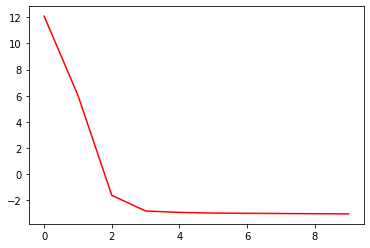

In [10]:

# create a seModeloquential model
## Viene de KERAS!
model = models.Sequential()

# Primera capa oculta de 20 nodos
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units, 
                       activation=activation))

# Primera capa oculta de 20 nodos
model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units, 
                       activation=activation))

# final de la red, outputs
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='relu'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

# train the parameters
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()


In [11]:

# create a seModeloquential model
## Viene de KERAS!
model = models.Sequential()

# Primera capa oculta de 20 nodos
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units, 
                       activation=activation,
          kernel_regularizer = regularizers.l1(1e-6)))

# segunda capa oculta de 20 nodos
model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units, 
                       activation=activation))

# final de la red, outputs
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='relu'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

In [12]:
# train the parameters
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size)


Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: -1.0445 - accuracy: 0.6694
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: -2.9950 - accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: -3.0447 - accuracy: 0.7742
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: -3.0639 - accuracy: 0.7823
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: -3.0707 - accuracy: 0.7823
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: -3.0720 - accuracy: 0.7823
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: -3.0730 - accuracy: 0.7823
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: -3.0730 - accuracy: 0.7823
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: -3.0730 - accuracy: 0.7823
Epoch 10/10
8/8 [==============================] - 0s 1ms/step - loss: -3.0730 - accuracy: 0.7823


2/2 [==============================] - 0s 8ms/step - loss: -5.9025 - accuracy: 0.5741
Training accuracy: 0.7822580933570862
Testing accuracy: 0.5740740895271301


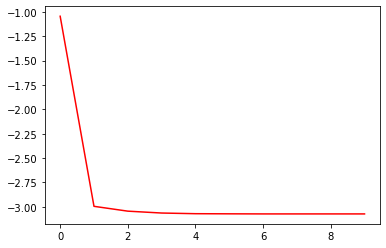

In [13]:

# evaluate accuracy
train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()


## Entonces, mejora en algo? pues mejoro un poco la prediccion

In [14]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [15]:
california.feature_names,california.target, california.data.shape

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 (20640, 8))

In [16]:
## Estandarizado, no normalizado!
scaler = StandardScaler()
scaler.fit(california.data)

X_train,X_test,y_train,y_test = train_test_split(california.data,california.target,test_size=0.3,random_state=123)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 


In [17]:
mlpR = sklearn.neural_network.MLPRegressor(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), 
                                           random_state=1,
                                           verbose=True)
mlpR.fit(X_train,y_train)

Iteration 1, loss = 1.26166861
Iteration 2, loss = 0.77521332
Iteration 3, loss = 0.64884565
Iteration 4, loss = 0.57095882
Iteration 5, loss = 0.49548317
Iteration 6, loss = 0.42373763
Iteration 7, loss = 0.36834685
Iteration 8, loss = 0.33423110
Iteration 9, loss = 0.31611752
Iteration 10, loss = 0.30530432
Iteration 11, loss = 0.29850573
Iteration 12, loss = 0.29358309
Iteration 13, loss = 0.28958253
Iteration 14, loss = 0.28622715
Iteration 15, loss = 0.28330139
Iteration 16, loss = 0.28065061
Iteration 17, loss = 0.27822887
Iteration 18, loss = 0.27601061
Iteration 19, loss = 0.27404174
Iteration 20, loss = 0.27217558
Iteration 21, loss = 0.27033030
Iteration 22, loss = 0.26860774
Iteration 23, loss = 0.26693238
Iteration 24, loss = 0.26531444
Iteration 25, loss = 0.26393603
Iteration 26, loss = 0.26250998
Iteration 27, loss = 0.26121148
Iteration 28, loss = 0.25997376
Iteration 29, loss = 0.25884843
Iteration 30, loss = 0.25787454
Iteration 31, loss = 0.25703915
Iteration 32, los

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
             solver='sgd', verbose=True)

In [19]:
df = pd.DataFrame({'predicted': mlpR.predict(X_test),
             'real': y_test})

pd.crosstab(index=df['real'], columns=df['predicted'], margins=True)


predicted,1.0067065336828516,1.0075261674184892,1.0088308245427258,1.0088450955681576,1.0097351029747441,1.0100842996797554,1.0102444642468156,1.010666095622807,1.0115813746251994,1.0119421506991577,...,6.202391618786217,6.233974953060784,6.294513284351789,6.396187345707123,6.402145481249871,6.423688648072396,6.4525647491669,6.511751311508908,6.643587523803953,All
real,,,,,,,,,,,,,,,,,,,,,
0.175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.225,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.25,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.275,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.325,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4.959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['real'],df['predicted'])

0.38837536501194614